Adriana Pedroza ap46365, Brandon Pham bp23792, Jack Diao qd572
February 6, 2020
EE 460J Data Science Lab
Lab 2

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [2]:
# When given a data matrix, an easy way to tell if any two columns are correlated is to 
# look at a scatter plot of each column against each other column. For a warm up, do this:
# Look at the data in DF1 in Lab2 Data.zip. Which columns are (pairwise) correlated?
# Figure out how to do this with Pandas, and also how to do this with Seaborn.

df1 = pd.read_csv('Lab2_Data/DF1')

In [3]:
#drop the first column which is the row labels

df1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df1.drop(["a"], axis=1, inplace=True)

In [4]:
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


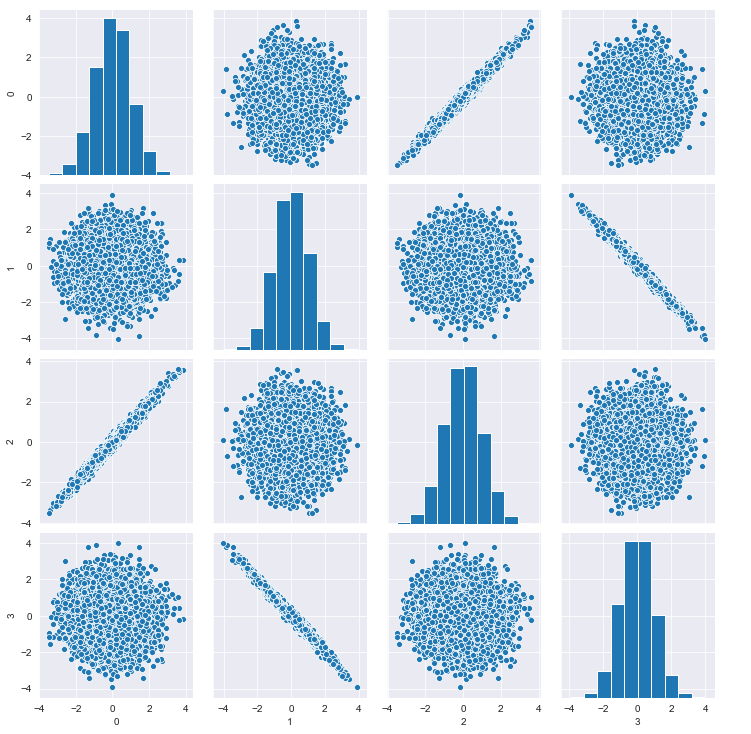

In [5]:
sns.set_style("darkgrid")
sns.pairplot(df1)

Columns 0 and 2 are positively pairwise correlated.
Columns 1 and 3 are negatively pairwise correlated.
The rest are uncorrelated.

Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

In [6]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


Problem 3

Compute this empirically, as follows: We will generate data for a regression problem, solve it,
and see what the error is: Generate data as follows: xi ∼ N(0, 1), ei ∼ N(0, 1). Generate y
by yi = β0 +xiβ +ei
, where β0 = −3 and β = 0. Note that since β = 0, this means that y and
x are unrelated! The question we are exploring here is as follows: when we solve a regression
problem, we are not going to find βˆ = 0 – we will find that βˆ takes some other values, hopefully
close to zero. How do we know if the value of βˆ we get is statistically meaningful?

• By creating fresh data and each time computing βˆ and recording βˆ − β, compute the
empirical standard deviation of the error for n = 150 (the number we used in class).
Suppose that we solve a linear regression of y vs. noise, and we find βˆ = −0.15. Given
your empirical computation of the standard deviation of the error, how significant is this
value −0.15?

In [7]:
# function to calculate the empirical standard deviation
def emp_std(n):
    errors = []
    beta = 0
    beta_0 = -3
    for i in range(n):
        X = np.random.normal(loc=0,scale=1,size=n)
        e = np.random.normal(loc=0,scale=1,size=n)
        y = beta_0 + np.dot(X,beta) + e

        # calculate βˆ and record errors
        beta_hat = np.dot(y,X) / np.dot(X,X)
        error = beta_hat - beta
        errors.append(error)
        
    emp_std = np.std(errors)
    return emp_std

emp_std(150)

0.2590677385778395

The βˆ value of -0.15 is not very significant because we can see that the emprical standard deviation of the errors is greater.

• Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot 1/
√
n. How is the fit?

Text(0.5, 1.0, 'Empirical Standard Deviation vs Number of Samples')

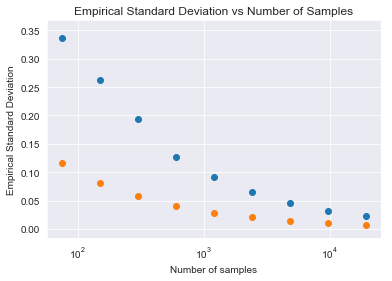

In [8]:
n_values = [75, 150, 300, 600, 1200, 2400, 4800, 9600, 19200]

emp_stds = []
one_over_sqrt_n = []
for n_value in n_values:
    emp_stds.append(emp_std(n_value))
    one_over_sqrt_n.append(1/math.sqrt(n_value))
    
# plot Empirical Standard Deviation vs Number of Samples
fig = plt.figure()
ax1 = plt.gca()

ax1.scatter(n_values, emp_stds, c='#1f77b4') 
ax1.scatter(n_values, one_over_sqrt_n, c='#ff7f0e')
ax1.set_xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Empirical Standard Deviation')
plt.title('Empirical Standard Deviation vs Number of Samples')
